## Import Modules

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [2]:
paths = []
labels = []
for dirname, _, filenames in os.walk(r"C:\Users\susha\OneDrive\Desktop\mp\major\TESS Toronto emotional speech set data"):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [3]:
len(paths)

2800

In [4]:
paths[:5]

['C:\\Users\\susha\\OneDrive\\Desktop\\mp\\major\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'C:\\Users\\susha\\OneDrive\\Desktop\\mp\\major\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'C:\\Users\\susha\\OneDrive\\Desktop\\mp\\major\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'C:\\Users\\susha\\OneDrive\\Desktop\\mp\\major\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'C:\\Users\\susha\\OneDrive\\Desktop\\mp\\major\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [5]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [6]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,C:\Users\susha\OneDrive\Desktop\mp\major\TESS ...,angry
1,C:\Users\susha\OneDrive\Desktop\mp\major\TESS ...,angry
2,C:\Users\susha\OneDrive\Desktop\mp\major\TESS ...,angry
3,C:\Users\susha\OneDrive\Desktop\mp\major\TESS ...,angry
4,C:\Users\susha\OneDrive\Desktop\mp\major\TESS ...,angry


In [7]:
df['label'].value_counts()

label
angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

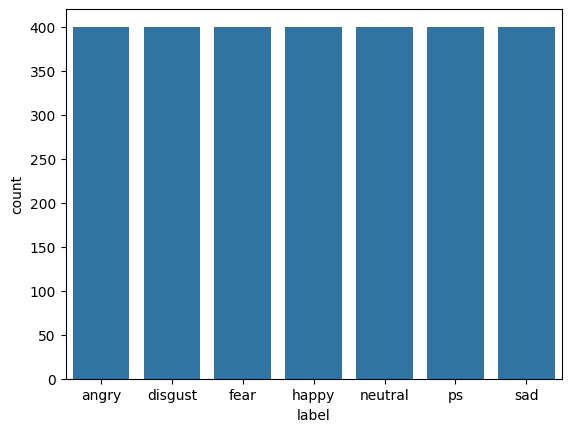

In [8]:
#Data visualiziation
sns.countplot(data=df, x='label')

In [9]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

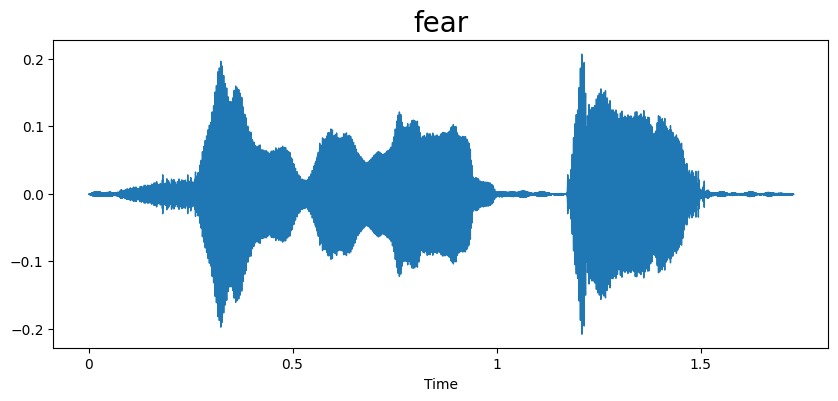

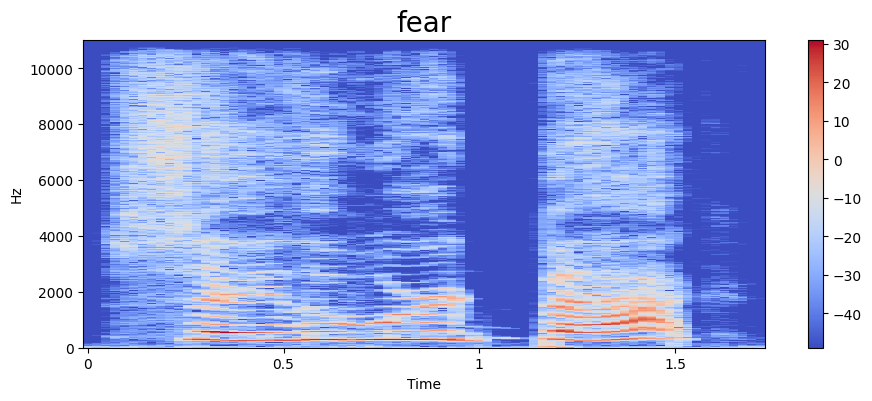

In [11]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

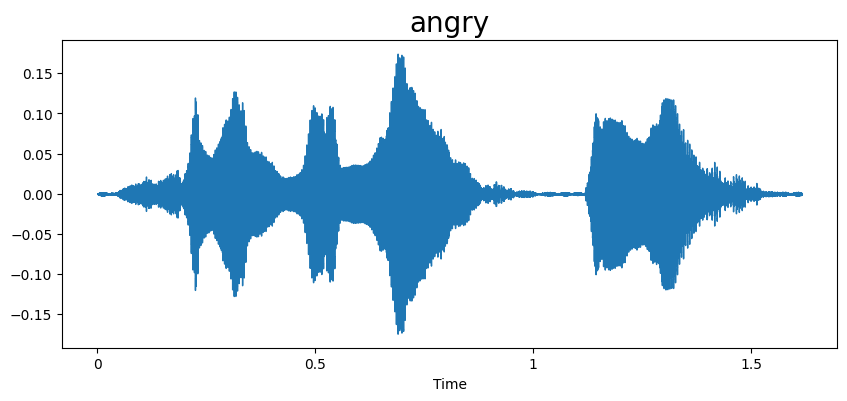

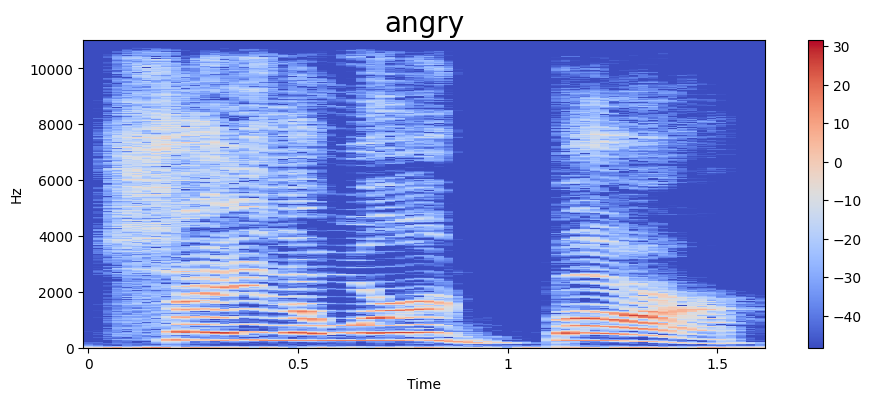

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

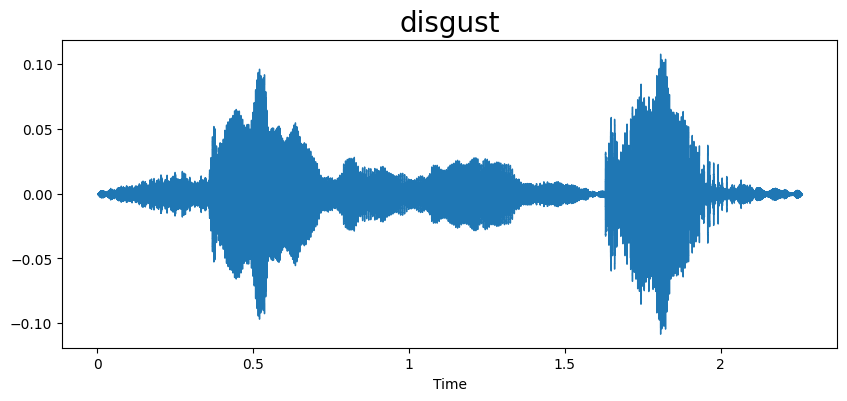

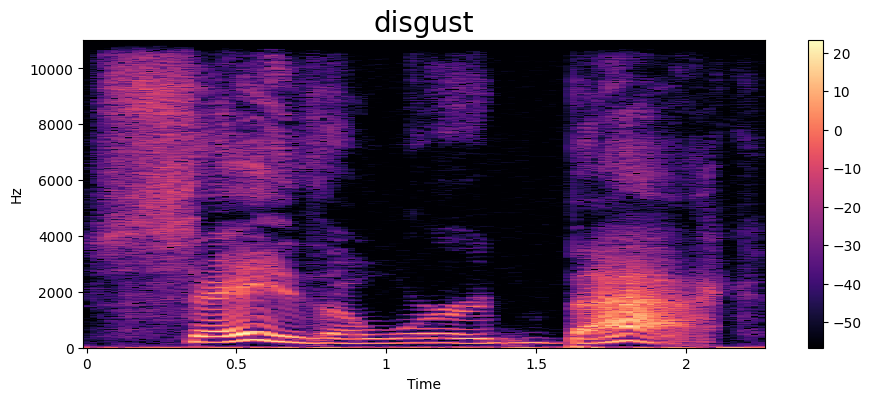

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

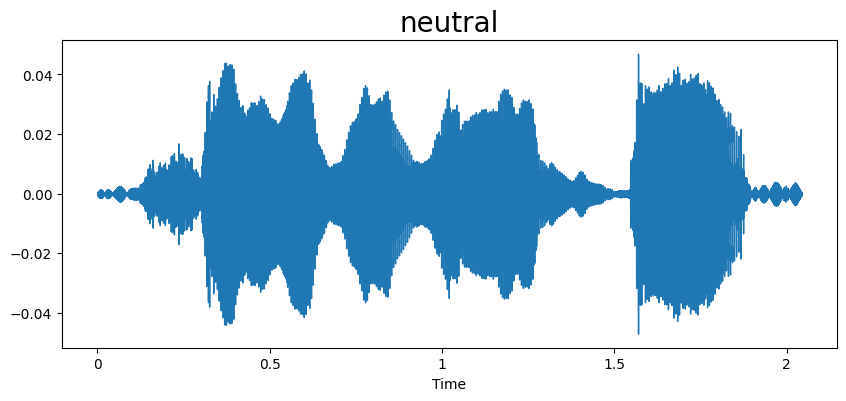

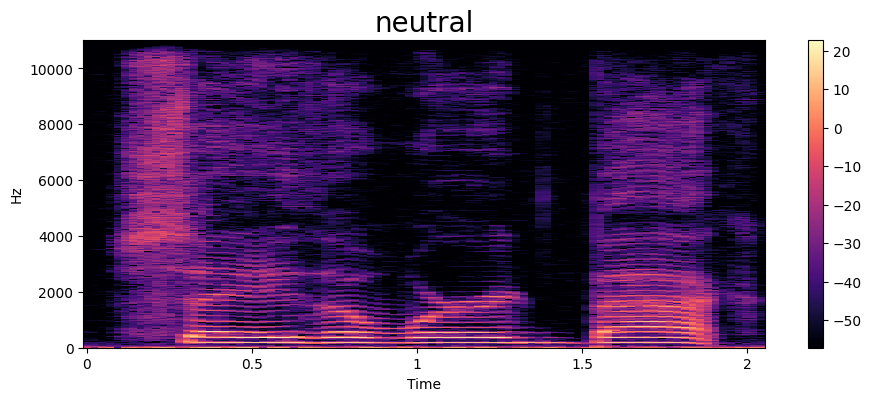

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

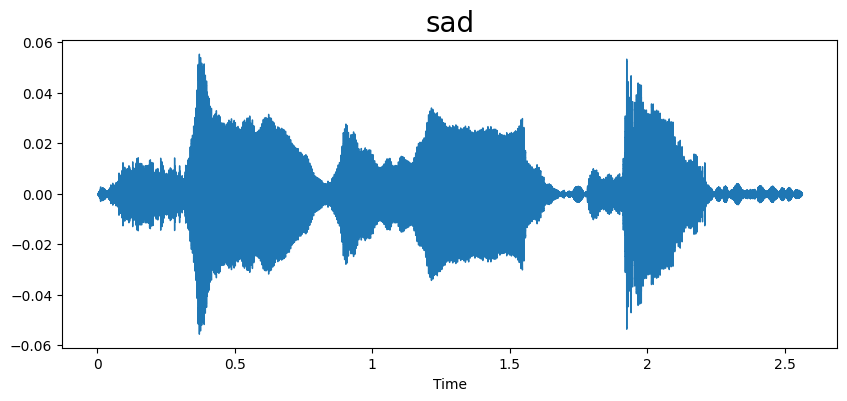

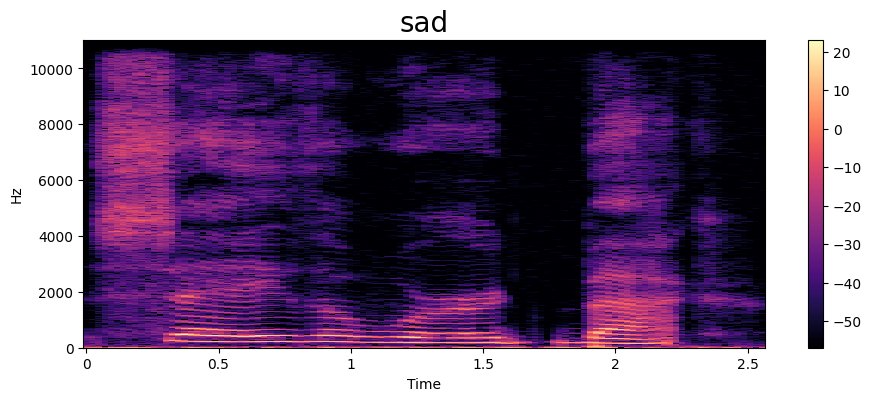

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

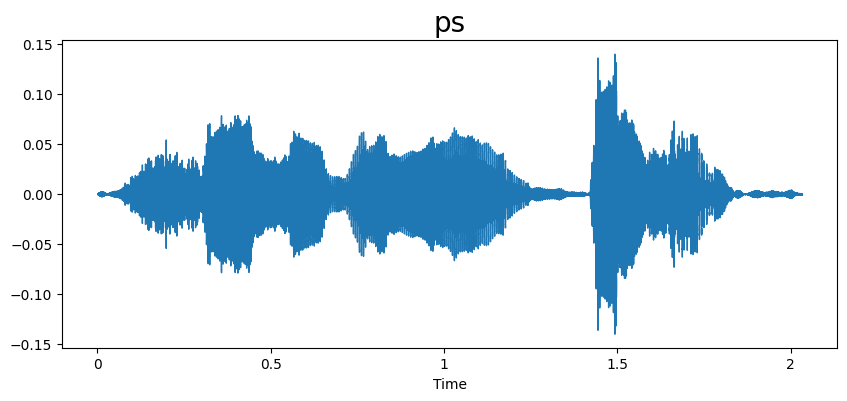

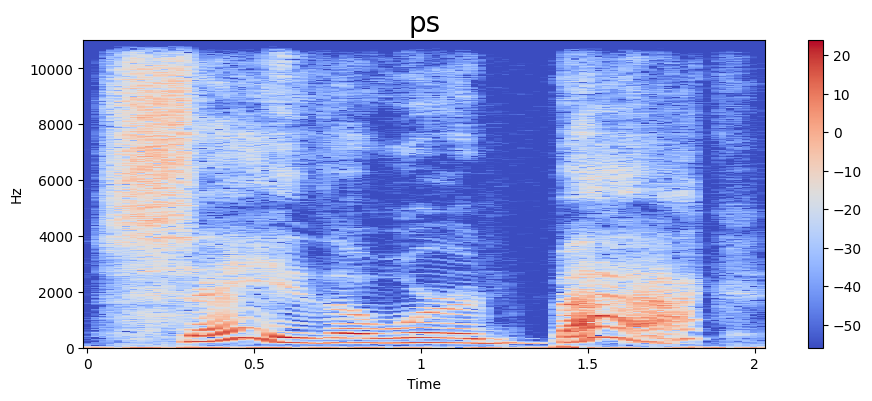

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

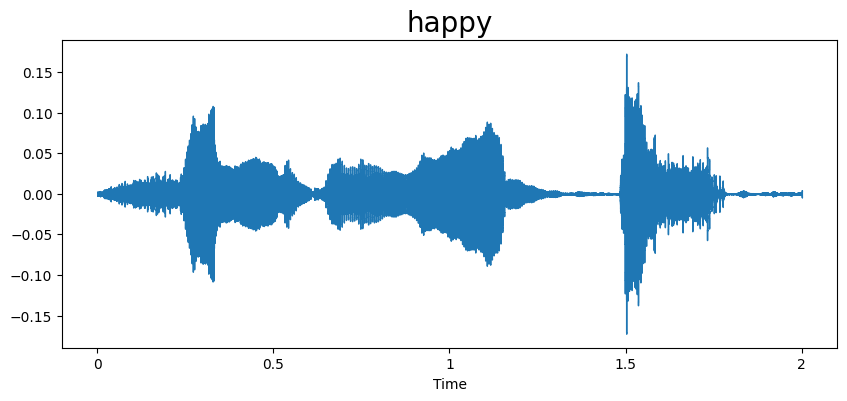

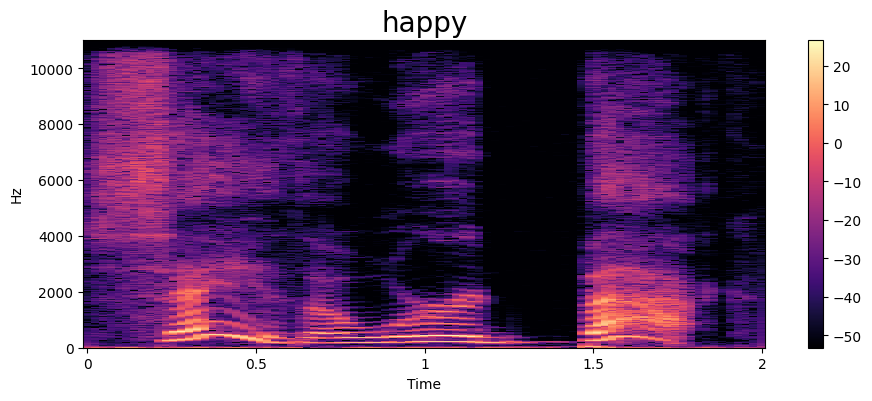

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275506e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228361e+00, -5.57365894e-01, -1.83255327e+00,  2.02101514e-01,
        7.27550924e-01,  1.31773770e+00,  2.88633752e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126286e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722492e-01,  5.11131430e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996351e+00, -1.82390726e+00,
        4.86896276e+00,  9.31392288e+00,  2.08915019e+00, -1.90649128e+00],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.6560087, -32.74544, -...
2       [-429.79196, 46.124, 1.5550478, -0.2170951, 2....
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
4       [-434.05756, 77.4455, 10.865499, 16.092943, 8....
                              ...                        
2795    [-553.2201, 89.83577, 27.215466, 16.407124, 19...
2796    [-589.23676, 96.20408, 36.96118, 15.014448, 28...
2797    [-533.41815, 85.43242, 27.791998, 19.307178, 2...
2798    [-548.6142, 110.16424, 31.910236, 12.572517, 2...
2799    [-549.2962, 102.374565, 32.268833, 26.261616, ...
Name: speech, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(2800, 7)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

class LSTMModel(nn.Module):
    def __init__(self):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=256, batch_first=True)
        self.dropout1 = nn.Dropout(0.2)
        self.fc1 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 64)
        self.dropout3 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(64, 7)

    def forward(self, x):
        # x shape: (batch_size, sequence_length=40, input_size=1)
        out, (h_n, c_n) = self.lstm(x)
        # take only the final hidden state from LSTM
        out = self.dropout1(h_n[-1])
        out = F.relu(self.fc1(out))
        out = self.dropout2(out)
        out = F.relu(self.fc2(out))
        out = self.dropout3(out)
        out = F.softmax(self.fc3(out), dim=1)
        return out

# Instantiate and move model to GPU if available
model = LSTMModel().to(device)

print(model)

Using device: cuda
LSTMModel(
  (lstm): LSTM(1, 256, batch_first=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (dropout3): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=64, out_features=7, bias=True)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [ ]:
X_tensor = torch.tensor(X, dtype=torch.float32)  
y_tensor = torch.tensor(np.argmax(y, axis=1), dtype=torch.long)  


In [ ]:
# Initialize accuracy tracking lists BEFORE training loop
train_accuracies = []
val_accuracies = []
from torch.utils.data import DataLoader, TensorDataset, random_split
# Training loop
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_acc = correct / total

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_acc = val_correct / val_total

    #  Store accuracy values at the end of each epoch
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, "
          f"Train Loss: {running_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")


Epoch 1/50, Train Loss: 41.6273, Train Acc: 0.9777, Val Loss: 10.7767, Val Acc: 0.9661
Epoch 2/50, Train Loss: 43.0124, Train Acc: 0.9362, Val Loss: 11.1931, Val Acc: 0.9232
Epoch 3/50, Train Loss: 42.1272, Train Acc: 0.9634, Val Loss: 10.8066, Val Acc: 0.9643
Epoch 4/50, Train Loss: 41.9050, Train Acc: 0.9679, Val Loss: 10.8951, Val Acc: 0.9536
Epoch 5/50, Train Loss: 42.4078, Train Acc: 0.9545, Val Loss: 10.9481, Val Acc: 0.9518
Epoch 6/50, Train Loss: 41.8319, Train Acc: 0.9705, Val Loss: 10.7115, Val Acc: 0.9732
Epoch 7/50, Train Loss: 41.9433, Train Acc: 0.9665, Val Loss: 10.9126, Val Acc: 0.9518
Epoch 8/50, Train Loss: 42.0938, Train Acc: 0.9629, Val Loss: 10.8647, Val Acc: 0.9554
Epoch 9/50, Train Loss: 42.8472, Train Acc: 0.9415, Val Loss: 10.9195, Val Acc: 0.9500
Epoch 10/50, Train Loss: 42.1782, Train Acc: 0.9612, Val Loss: 10.8983, Val Acc: 0.9554
Epoch 11/50, Train Loss: 41.8992, Train Acc: 0.9692, Val Loss: 11.0180, Val Acc: 0.9375
Epoch 12/50, Train Loss: 41.9915, Train A

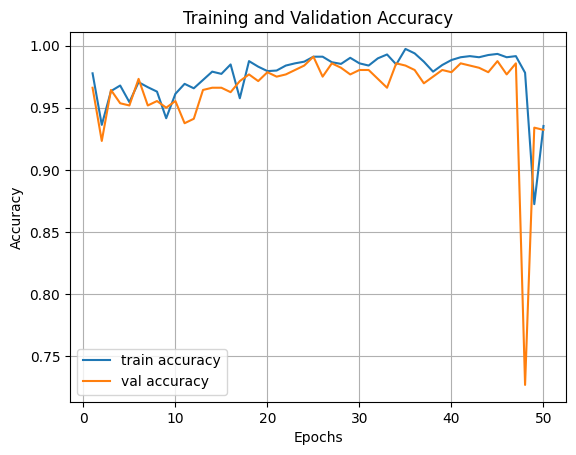

In [ ]:
import matplotlib.pyplot as plt

epochs = list(range(1, num_epochs + 1))
plt.plot(epochs, train_accuracies, label='train accuracy')
plt.plot(epochs, val_accuracies, label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title("Training and Validation Accuracy")
plt.show()


In [ ]:
torch.save(model.state_dict(), 'lstm_model.pth1')
